In [76]:
import graph_tool_extras as gte
import netpixi
from graph_tool import draw
import distribution as dst
import matplotlib.pyplot as plt


In [53]:
PATH = './archive/hero-network.csv'

In [54]:
def get_or_add_vertex(g, id):
    u = g.vertex_by_id(id)
    if u is None:
        g.add_vertex_by_id(id)


In [55]:
with open(PATH) as file:
    g = gte.Graph(directed=False)
  
    next(file)

    for line in file:


        parts = line.split('","')
        parts[0] = parts[0][1:]
        parts[1] = parts[1][:-2]

        get_or_add_vertex(g,parts[0])
        get_or_add_vertex(g,parts[1])

        g.add_edge_by_ids(parts[0], parts[1])





In [56]:
gte.save(g, 'g.net.gz')

In [57]:
layout = draw.sfdp_layout(g)

In [58]:
g = gte.clean(g)

In [59]:
gte.move(g, layout)
gte.save(g, 'g.net.gz')

In [60]:
r = netpixi.render('g.net.gz', infinite=True)


In [61]:
r.vertex_default(size=4, bwidth=1)

In [77]:
g.density()

2.8

In [78]:
g.transitivity()

63.08

In [79]:
degrees = g.get_total_degrees()

In [80]:
degrees.describe()

count     6408.000000
mean       179.274657
std        723.189201
min          1.000000
25%         13.000000
50%         33.000000
75%        102.000000
max      16499.000000
dtype: float64

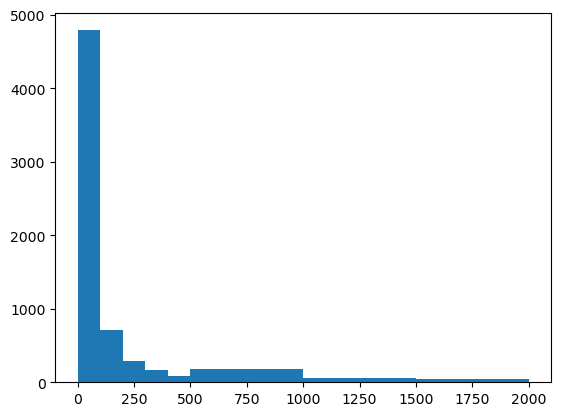

In [84]:
plt.hist(degrees,bins=[0,100, 200, 300, 400, 500, 1000, 1500, 2000]);
plt.savefig('hist.png')

In [85]:
dst.not_normal(degrees)

0.0

In [86]:
dst.more_powerlaw_than_lognormal(degrees)

Calculating best minimal value for power law fit


(False, 0.04622734621088012)

In [87]:
dst.more_powerlaw_than_exponential(degrees)

Calculating best minimal value for power law fit


(True, 7.312169431430195e-27)

In [97]:
distances = g.get_distances()

In [98]:
distances.describe()

count    4.106246e+07
mean     2.638019e+00
std      5.410575e-01
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      5.000000e+00
dtype: float64

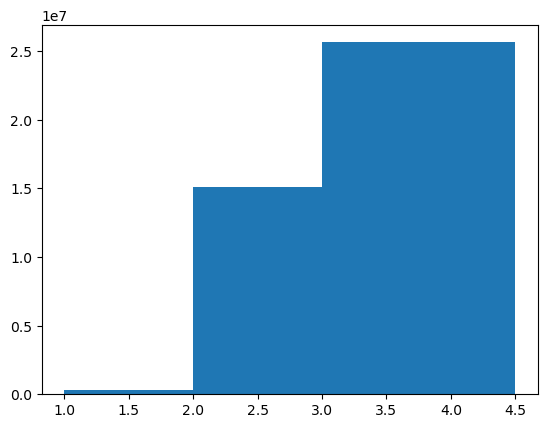

In [100]:
plt.hist(distances,bins=[1,2,3,4.5]);
plt.savefig('hist_distance.png')